In [35]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

## Clean The Data

In [36]:
# read in the lateral repairs data 
df = pd.read_csv(r"X:\KatrinaLegislativeProject\JOIN_repairs_census_tracts.csv")

In [37]:
# read in csv containing field of households per tract
households = pd.read_csv(r"X:\KatrinaLegislativeProject\2010_Census_Clean.csv")

In [38]:
# merge data on households with lateral repairs
density = df.merge(households, how = 'outer', left_on = 'NAME', right_on = 'Tract')

In [39]:
# subset the data 
density = density[['GRIDCODE', 'HC02_EST_V', 'NAME', 'HC01_EST_VC02']]
# rename the data columns
density = density.rename(columns = {"HC02_EST_V" : "Median Household Income", "HC01_EST_VC02": "Households"})

In [40]:
# drop null values
density = density.dropna()

In [42]:
# normalize the data by dividing the gridcode value by the number of households in census tract
density['NORMALIZE'] = density['GRIDCODE'] / density["Households"]

In [57]:
# get median household income to split the dataset
income_median = np.median(density["Median Household Income"])
print ("Income Median of Minneapolis Census Tracts is ${}".format(income_median))

Income Median of Minneapolis Census Tracts is $61911.0


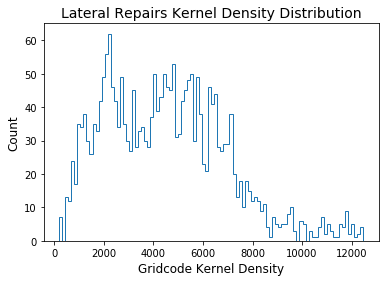

In [53]:
# plot distribution of kernel density gridcode values for lateral repairs distribution
_ = plt.hist(density['GRIDCODE'], bins = 100, histtype = 'step')
plt.xlabel('Kernel Density Gridcode', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Lateral Repairs Kernel Density Distribution', fontsize=14)
plt.show()

 The distribution of gridcode kernel density values for lateral repairs is skewed right

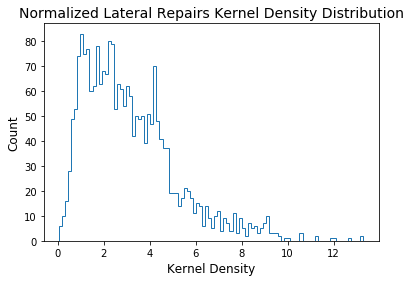

In [58]:
# plot the kernel density gridcode distribution of lateral repairs after normalizing the data by households
# per census tract
_ = plt.hist(density['NORMALIZE'], bins = 100, histtype = 'step')
plt.xlabel('Kernel Density Gridcode', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Normalized Lateral Repairs Kernel Density Distribution', fontsize=14)
plt.show()the population mean of kernel density gridcode values for lateral repairsthe population mean of kernel density gridcode values for lateral repairs

 The distribution of gridcode kernel density values for lateral repairs normalized by households per census tract has a more pronounced tail, as the normalization pulled many of the values lower. 

## Split the Lateral Repairs Dataset of Points Above and Below Median Income for Minneapolis

In [45]:
# split lateral repairs above and below median income for Minneapolis
below_median = density.loc[density["Median Household Income"] < income_median]
above_median = density.loc[density["Median Household Income"] > income_median]

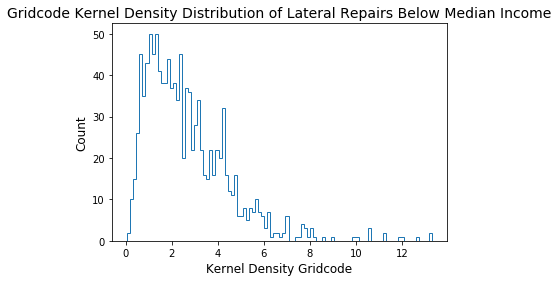

In [59]:
_ = plt.hist(below_median['NORMALIZE'], bins = 100, histtype = 'step')
plt.xlabel('Kernel Density Gridcode', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Gridcode Kernel Density Distribution of Lateral Repairs Below Median Income', fontsize=14)
plt.show()

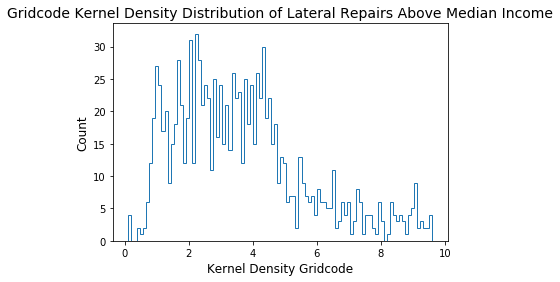

In [60]:
_ = plt.hist(above_median['NORMALIZE'], bins = 100, histtype = 'step')
plt.xlabel('Kernel Density Gridcode', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Gridcode Kernel Density Distribution of Lateral Repairs Above Median Income', fontsize=14)
plt.show()

## Run Inferential Statistics Whitney Test 

Alpha = .05

Ho = There is no difference between the population mean of kernel density gridcode values for lateral repairs above the median income and below the median income in Minneapolis

Ha = There is a significant difference between the population mean of kernel density gridcode values for lateral repairs above the median income and below the median income in Minneapolis. 

In [62]:
s, p = stats.mannwhitneyu(above_median['NORMALIZE'], below_median['NORMALIZE'], alternative = "two-sided")
print("P- value= {}".format(p))

P- value= 2.1122130441e-38


The p-value obtained through the Mann Whitney U test is below the alpha level, meaning we can reject the null hypothesis that the two distributions have the same mean.